<h1>Quality of red wine depending on chemical composition: dataset analysis</h1>


This dataset shows information about different variants of portuguese "Vinho Verde" wine, their chemical composition and rate.

The columns from the dataset:

1) fixed acidity (g /dm^3) - фиксированная кислотность 
2) volatile acidity (g /dm^3) - кислотность паров
3) citric acid (g /dm^3) - лимонная кислота
4) residual sugar (g /dm^3) - сахар
5) chlorides (g /dm^3) - хлориды
6) free sulfur dioxide (mg /dm^3) - свободный диоксид серы
7) total sulfur dioxide (mg /dm^3) - общее количество диоксида серы
8) density (g /cm^3) - плотность
9) pH: pH
10) sulphates (g /dm3) - сульфаты
11) alcohol (% by volume)
12) quality (score between 0 and 10)




Imports: 

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
import random
path='data\winequality-red (1).csv'


df = pd.read_csv(path)


# df.head(20)


<h2>Preparation of dataset:</h2>

1) according to task, i would add few Nan values into table
2) I need to delete NaN values from table
3) let add new column: sulfur dioxide in the drink = (total sulfur dioxide - free sulfur dioxide), that might be useful in future

In [50]:

for i in range(100):
       new_record = pd.DataFrame([[np.NaN, random.randint(0,10)/10, random.randint(0,10)/10, random.randint(0,10)/10,
              random.randint(0,10)/10, random.randint(0,10)/10, random.randint(0,10)/10,random.randint(900,1000)/1000,
             random.randint(0,10), random.randint(0,10)/10, random.randint(4,15), random.randint(0,10)]],columns=df.columns)
       df = pd.concat([df, new_record],ignore_index=True)
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1689,NaN,0.0,1.0,0.9,0.4,0.6,0.6,0.906,5.0,0.2,7.0,3
1690,NaN,0.1,0.3,0.2,0.3,0.6,0.8,0.951,6.0,1.0,10.0,4
1691,NaN,1.0,0.7,0.9,1.0,0.4,0.6,0.902,9.0,0.0,9.0,9
1692,NaN,0.2,0.9,0.1,0.8,0.6,0.1,0.994,3.0,0.2,10.0,10
1693,NaN,0.4,0.7,0.7,0.0,0.4,0.9,0.976,4.0,0.1,4.0,7
1694,NaN,0.4,0.7,0.1,0.9,0.7,0.9,0.974,0.0,1.0,7.0,5
1695,NaN,0.3,1.0,0.4,0.2,0.8,0.4,0.924,8.0,0.6,5.0,10
1696,NaN,0.9,0.9,0.3,0.8,0.7,0.9,0.921,4.0,0.9,8.0,10
1697,NaN,1.0,0.2,0.2,0.3,0.7,0.8,0.954,6.0,0.9,14.0,5
1698,NaN,0.0,0.3,0.0,0.8,0.1,0.1,0.997,2.0,0.7,14.0,0


In [51]:
df = df.dropna()

<h2>Data transformation</h2>

1) let add new column: sulfur dioxide(in the drink) = (total sulfur dioxide - free sulfur dioxide) -- sulfur dioxide inside the wine, that might be useful in future

2) let us add new column: part of sugar in density of the drink = (residual sugar / ( 100* density)) -- that param illustrate which part of density of the drink is got from sugar


In [143]:

df["sulfur dioxide"] = df["total sulfur dioxide"] - df["free sulfur dioxide"]

df["part of sugar"] = df["residual sugar"] / ( 100 * df["density"] )
df = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',"part of sugar",
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulfur dioxide','density',
       'pH', 'sulphates', 'alcohol', 'quality']]
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,part of sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.019042,0.076,11.0,34.0,23.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.026083,0.098,25.0,67.0,42.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.023069,0.092,15.0,54.0,39.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.019038,0.075,17.0,60.0,43.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.019042,0.076,11.0,34.0,23.0,0.9978,3.51,0.56,9.4,5


<h2>Overview</h2>



Let is take a look on some chemical characteristics: <b>quality, density, sulfur dioxide, fixed acidity, sulphates.</b>

Let us find mean, median, standard deviation, min and max of then

In [53]:
mean_of_quality = df["quality"].mean()
mean_of_density = df["density"].mean()
mean_of_sulfur_dioxide = df["sulfur dioxide"].mean()
mean_of_fixed_acidity = df["fixed acidity"].mean()
mean_of_sulphates = df["sulphates"].mean()
mean_of_alcohol = df["alcohol"].mean()
mean_column = ["mean",mean_of_quality,mean_of_density,mean_of_sulfur_dioxide,mean_of_fixed_acidity,mean_of_sulphates,mean_of_alcohol]


median_of_quality = df["quality"].median()
median_of_density = df["density"].median()
median_of_sulfur_dioxide = df["sulfur dioxide"].median()
median_of_fixed_acidity = df["fixed acidity"].median()
median_of_sulphates = df["sulphates"].median()
median_of_alcohol = df["alcohol"].median()
median_column = ["median",median_of_quality,median_of_density,median_of_sulfur_dioxide,median_of_fixed_acidity,median_of_sulphates,median_of_alcohol]

std_of_quality = df["quality"].std()
std_of_density = df["density"].std()
std_of_sulfur_dioxide = df["sulfur dioxide"].std()
std_of_fixed_acidity = df["fixed acidity"].mean()
std_of_sulphates = df["sulphates"].std()
std_of_alcohol = df["alcohol"].std()
std_column = ["Standard deviation",std_of_quality,std_of_density,std_of_sulfur_dioxide,std_of_fixed_acidity,std_of_sulphates,std_of_alcohol]


min_of_quality = df["quality"].min()
min_of_density = df["density"].min()
min_of_sulfur_dioxide = df["sulfur dioxide"].min()
min_of_fixed_acidity = df["fixed acidity"].min()
min_of_sulphates = df["sulphates"].min()
min_of_alcohol = df["alcohol"].min()
min_column = ["min",min_of_quality,min_of_density,min_of_sulfur_dioxide,min_of_fixed_acidity,min_of_sulphates,min_of_alcohol]

max_of_quality = df["quality"].max()
max_of_density = df["density"].max()
max_of_sulfur_dioxide = df["sulfur dioxide"].max()
max_of_fixed_acidity = df["fixed acidity"].max()
max_of_sulphates = df["sulphates"].max()
max_of_alcohol = df["alcohol"].max()
max_column = ["max",max_of_quality,max_of_density,max_of_sulfur_dioxide,max_of_fixed_acidity,max_of_sulphates,max_of_alcohol]

names = ["name","quality","density","sulfur dioxide","fixed acidity","sulphates","alcohol"]
data = [np.array([names[i],mean_column[i],median_column[i],std_column[i],min_column[i],max_column[i]]) for i in range(len(names))]
# data = [np.array(names),np.array(mean_column),np.array(std_column),np.array(min_column),np.array(max_column),]
new_graph = pd.DataFrame(data=data[1:],columns=data[0])

# print("mean of quality: ",mean_of_quality,"\n","mean of density: ",mean_of_density,"\n","mean of sulfur: ",
#       mean_of_sulfur_dioxide,"\n","mean of quality: ",mean_of_quality,"\n","mean of sulphates: ",mean_of_sulphates,"\nmean of alcohol: ",mean_of_alcohol,"\n\n",sep="")
# # print("Standard deviation of quality: ",std_of_quality,"\n","Standard deviation of density: ",std_of_density,"\n","Standard deviation of sulfur: ",
#       std_of_sulfur_dioxide,"\n","Standard deviation of fixed acidity: ",std_of_fixed_acidity,"\nStandard deviation of sulphates: ",std_of_sulphates,"\nStandard deviation of alcohol: ",std_of_alcohol,"\n\n",sep="")


new_graph

,name,mean,median,Standard deviation,min,max
0,quality,5.6360225140712945,6.0,0.807569439734705,3,8
1,density,0.9967466791744841,0.99675,0.0018873339538425554,0.99007,1.00369
2,sulfur dioxide,30.592870544090058,21.0,27.056278651557296,3.0,251.5
3,fixed acidity,8.31963727329581,7.9,8.31963727329581,4.6,15.9
4,sulphates,0.6581488430268917,0.62,0.16950697959010996,0.33,2.0
5,alcohol,10.422983114446529,10.2,1.0656675818473946,8.4,14.9


From the table we can see:
1) that degree of alcohol has a big standard deviation, so we can name a wine high alcohol concentrated, if it has more, than 11 degrees in it(it might be important in the future)
2) sulfur dioxide has a standard deviation all most the same as it's mean value. So we can't find value of sulfur dioxide, that can be called as normal 
3) 
...




<h4>Also we have to know number of wines by their different qualities.</h4> 


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


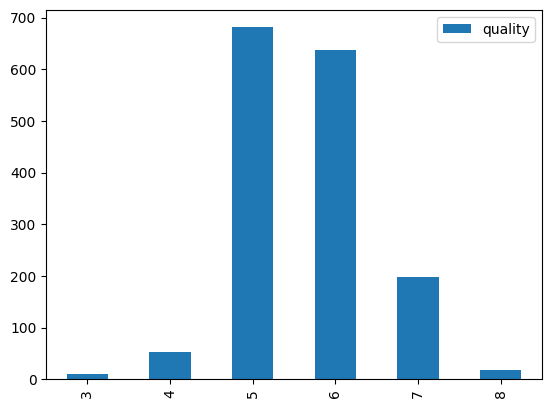

In [73]:
# quality_df = pd.DataFrame({"quality":[3,4,5,6,7,8],"number of wines":list(df.loc(df["quality"]==3).shape,df.loc(df["quality"]==4).shape,df.loc(df["quality"]==5).shape,
#                                                                       df.loc(df["quality"]==6).shape,df.loc(df["quality"]==7).shape,df.loc(df["quality"]==8).shape)})
print(df.quality.value_counts(""))
new_df = pd.DataFrame(df.quality.value_counts()).sort_index()
# quality_df = pd.DataFrame(index = df.qualiy,"number of values":df.)
ax = new_df.plot.bar()


As we can see: the wines with rate 5 have biggest number of rows, while wines with quality 3 have the least number of records. 

<br>

<h4>Now i would take a look on correlation graph and on correlation heatmap. </h4>

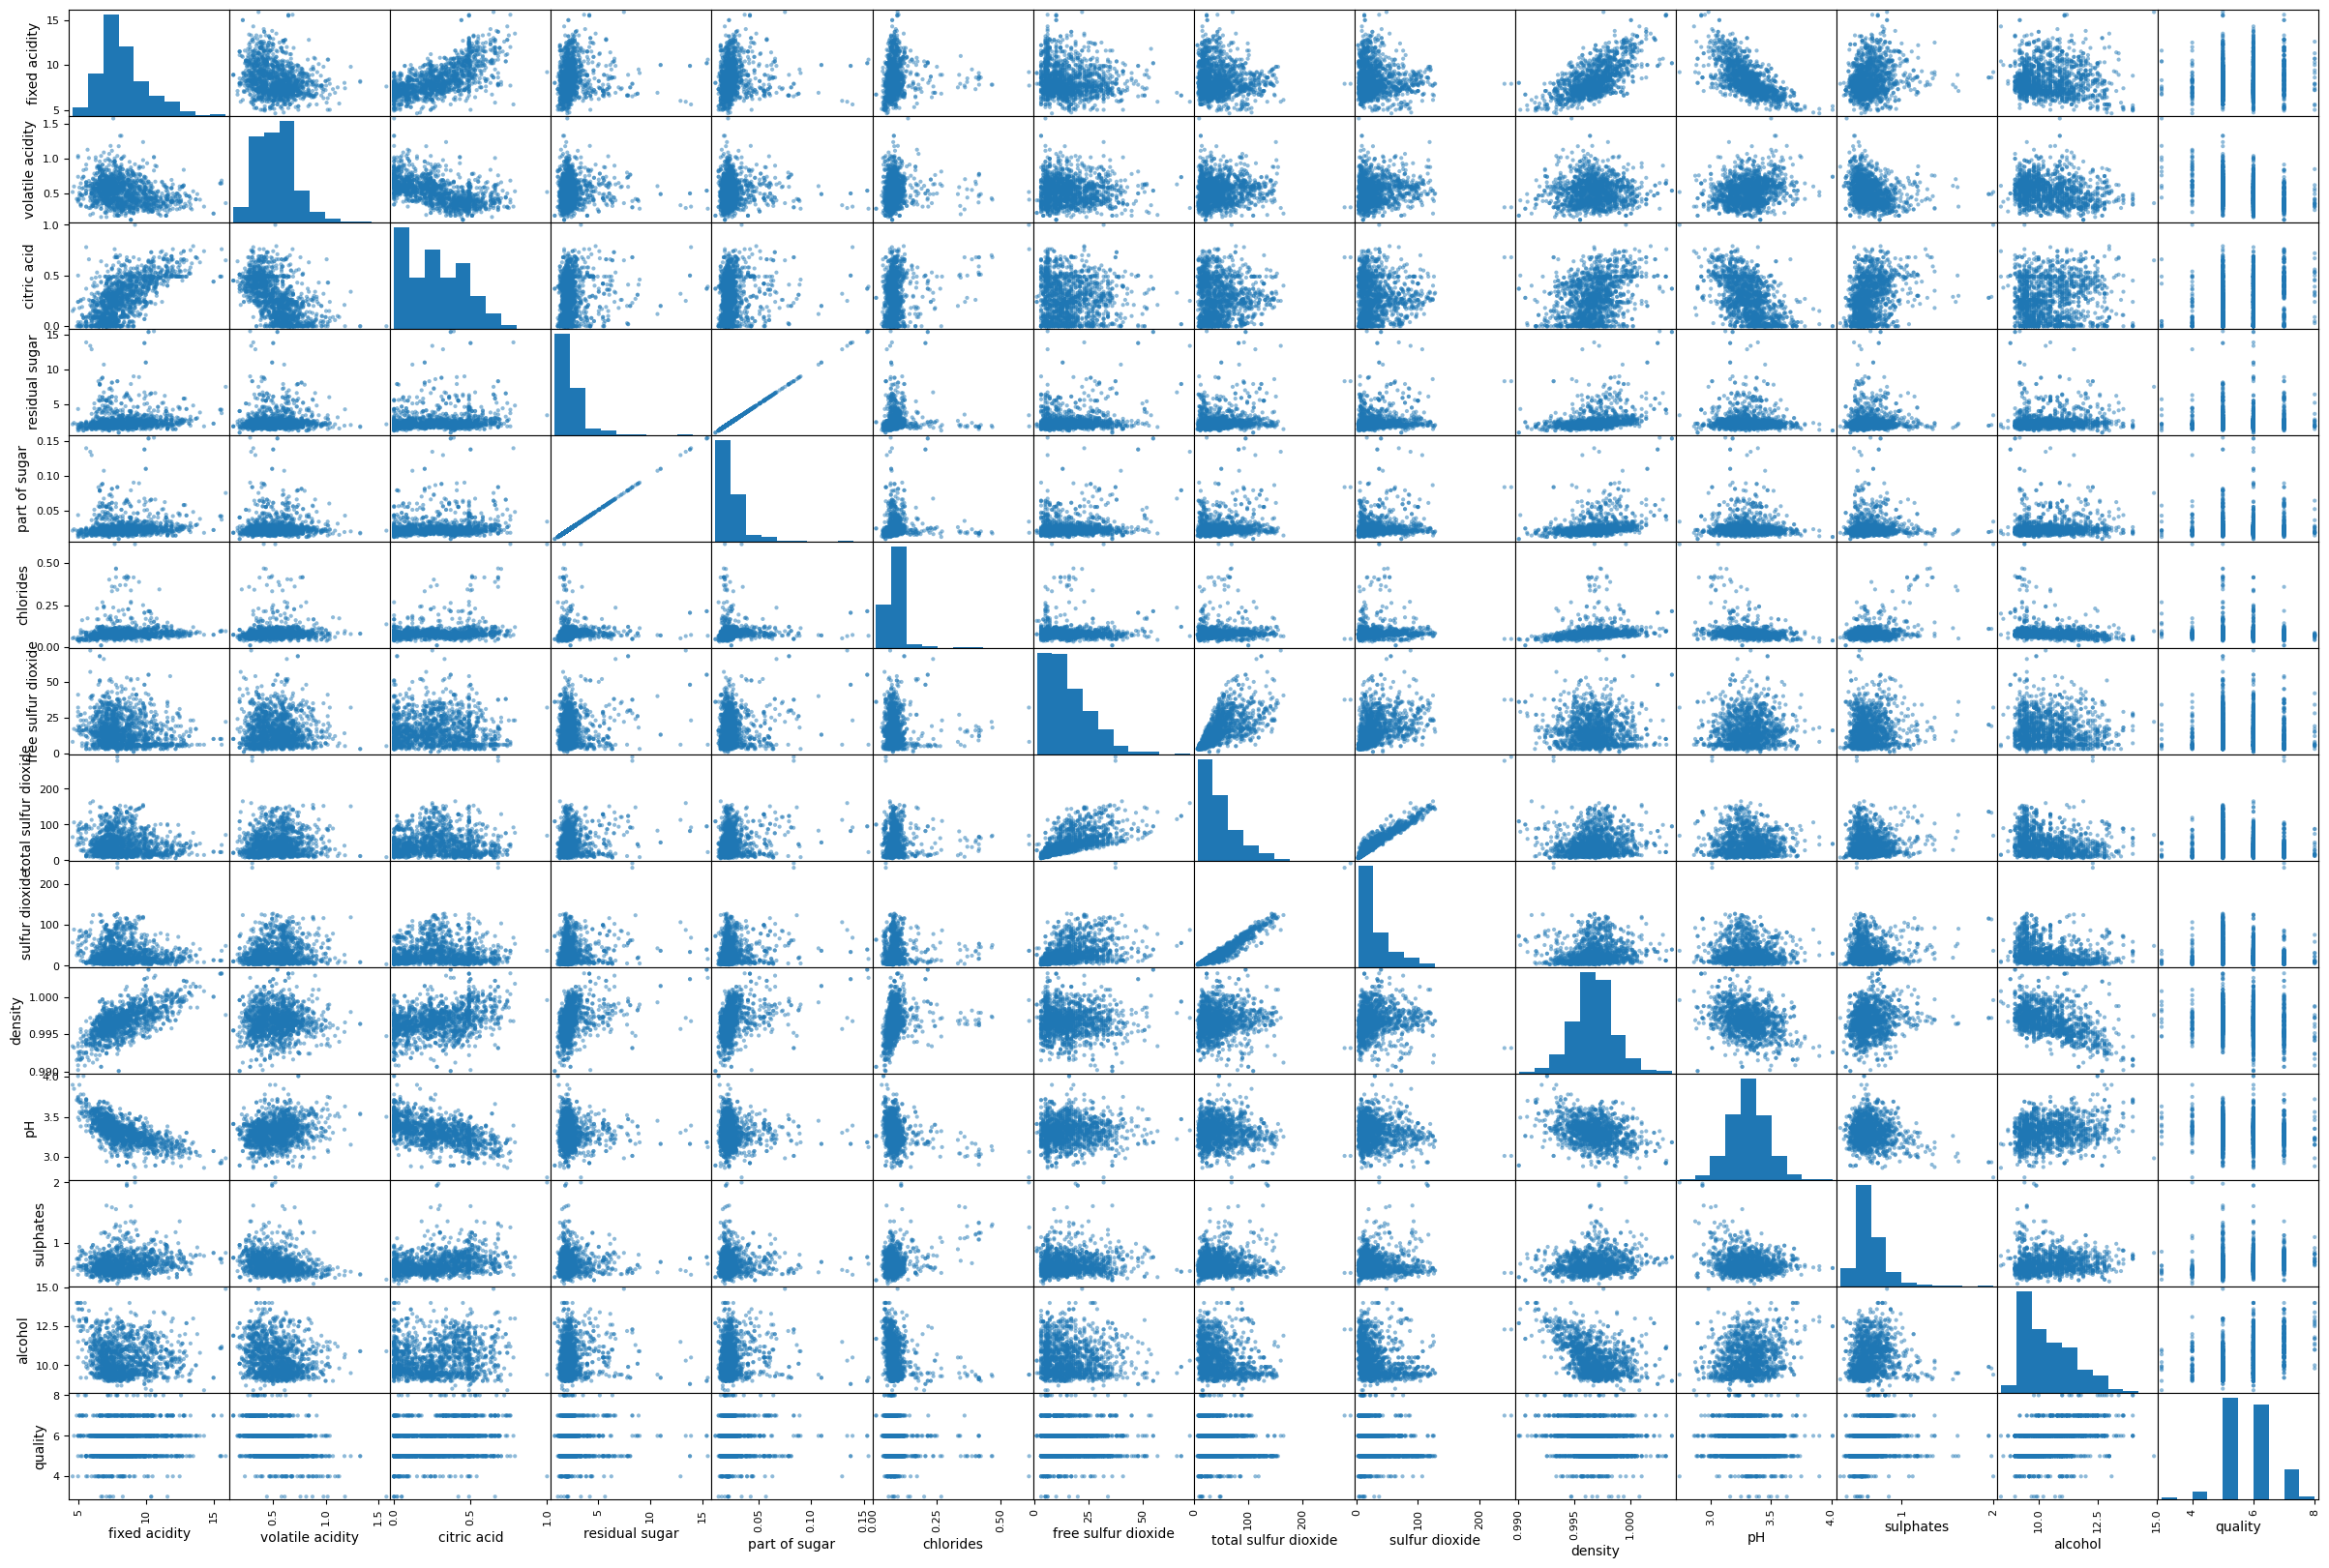

In [144]:
corr = df.corr()

pd.plotting.scatter_matrix(pd.DataFrame(data=df, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',"part of sugar",
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulfur dioxide','density',
       'pH', 'sulphates', 'alcohol', 'quality']), figsize=(30, 20))
plt.show()

<AxesSubplot: >

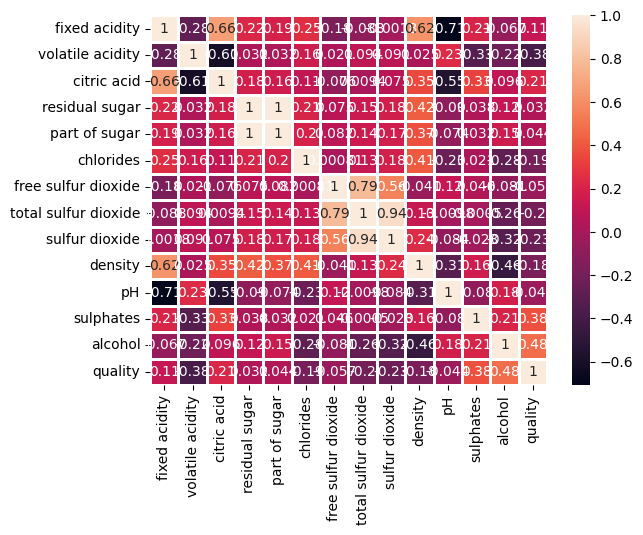

In [145]:
# df.loc[df["quality"]>=7].corr()
sns.heatmap(df.corr(method="spearman"),annot = True,linewidths=2)

From correlation graph and heatmap we can see:
1) quality correlate with alcohol on 50%
2) quality correlate with sulphates all most on 40%
3) fixed acidity correlate with density more, than on 60%, while density correlate with sugar on 40%(that is really interesting)
4) quality correlate fixed acidity on 11 %
5) quality correlate with density on -18%

<h3>Now we can take a look on some boxes graphs:</h3>

density    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

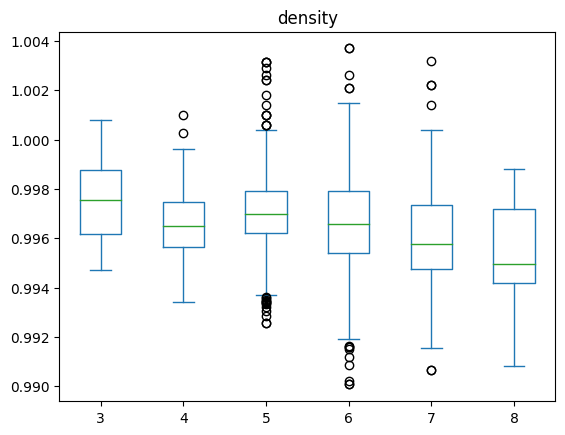

In [55]:
df.plot.box(column="density",by="quality")


What stands out from the graph:<b> wines with higher rate more often have lower density</b>( because there are a lot more dots under the 0.9975 line on wines with rate 7,8)

sulphates    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

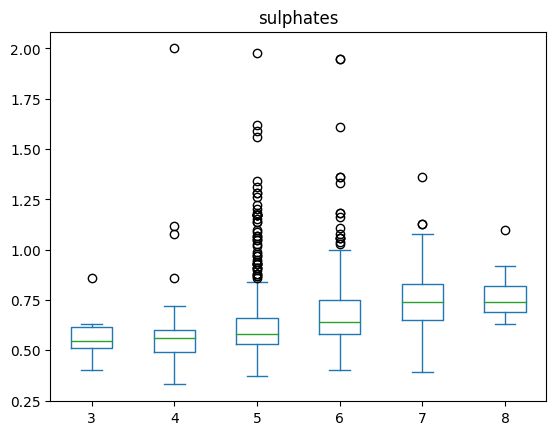

In [56]:
df.plot.box(column="sulphates",by="quality")


From the box graph we can see, that<b> mean of sulphates in wine is higher in better wines</b>. 

alcohol    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

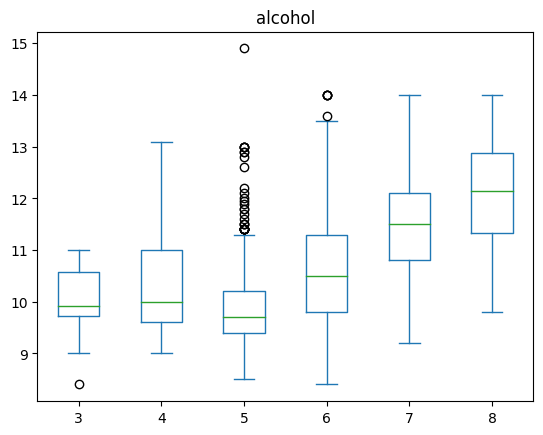

In [57]:
df.plot.box(column="alcohol",by="quality")


<b>Drinks with band 7 and 8 have higher mean value of alcohol</b>, that stands out from the box diagram

[0.8844999999999998, 0.6939622641509432, 0.5770411160058737, 0.49748432601880876, 0.40391959798994975, 0.4233333333333334]


Text(0.5, 0, 'quality')

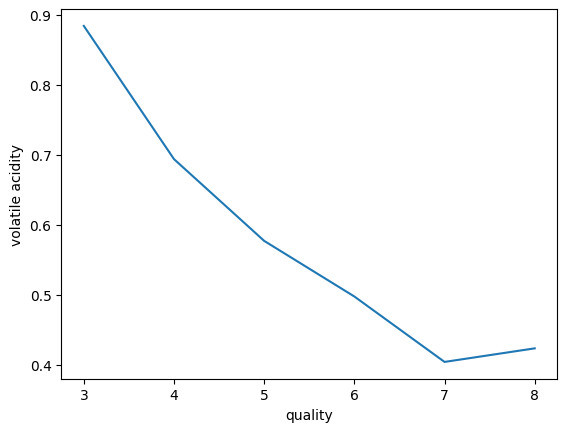

In [84]:
lst_quality=[]
volatile=[]
for quality in [3,4,5,6,7,8]:
    lst_quality.append(quality)
    volatile.append(df.loc[df["quality"]==quality]["volatile acidity"].mean())
print(volatile)
plt.plot(lst_quality,volatile)
plt.ylabel("volatile acidity")
plt.xlabel("quality")

As we can see from the graph: wine with highest quality have lower mean value of volatile acidity 

<b><h1>My Hypothesis</b></h1>

Quality of wine mostly depends on degree of alcohol, volatile acidity, sulphates, fixed acidity and density. 

1)The quality of drink is higher, if amount of sulphates and citric acid and alcohol level is bigger

2)The volatile acidity has a huge negative impact on wine rate

3)Higher level of fixed acidity gives better quality of the drink, but also it increase density of a drink. Extra density decrease the rate of wine. <b>So, the best drink quality can be rich, if somehow producer of wine could rise fixed acidity without growing density</b>




<h3> Hypothesis check </h3>
<br>

Let as see mean value of quality, than level of sulphates or level of alcohol or citric acid is high

In [103]:
print(df.loc[df["sulphates"]>mean_of_sulphates+std_of_sulphates]["quality"].mean())

5.963541666666667


As we can see, mean of quality in wine with high level of sulphates is higher on 0.4 points
<br>
<br>
Now let's check high level of alcohol

In [107]:
print(df.loc[df["alcohol"]>mean_of_alcohol+std_of_alcohol]["quality"].mean()," - mean of quality with high alcohol degree")
print("\n\ndelta of quality:",-mean_of_quality+df.loc[df["alcohol"]>mean_of_alcohol+std_of_alcohol]["quality"].mean())

6.3464285714285715  - mean of quality with high alcohol degree


delta in quality: 0.710406057357277


wines with high level of alcohol have better quality(on 0.7 points)
<br>
<br>
I would look through quality of wines, filtered by some chemical criteria.

Text(0, 0.5, 'quality')

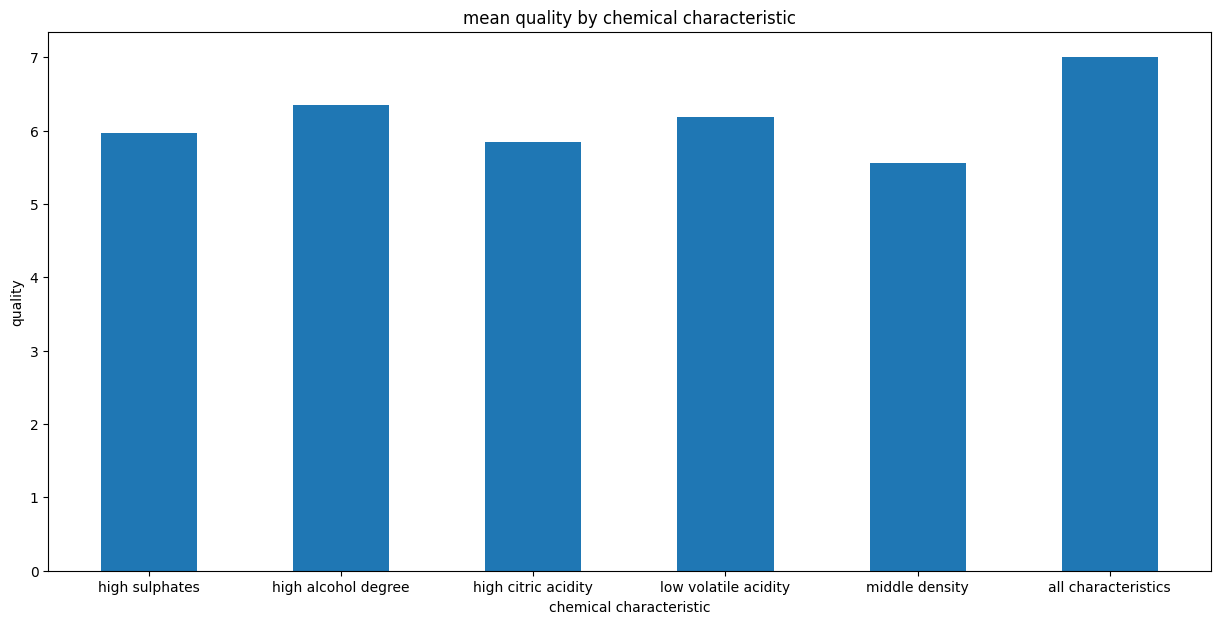

In [140]:
quality_with_sulphates = df.loc[df["sulphates"]>mean_of_sulphates+std_of_sulphates]["quality"].mean()
quality_with_alcohol = df.loc[df["alcohol"]>mean_of_alcohol+std_of_alcohol]["quality"].mean()
quality_with_citric_acidity = df.loc[df["citric acid"]>df["citric acid"].mean()+df["citric acid"].std()]["quality"].mean()
quality_with_low_volatile_acidity = df.loc[df["volatile acidity"]<df["volatile acidity"].mean()-df["volatile acidity"].std()]["quality"].mean()
quality_with_middle_density =  df.loc[(abs(df["density"]- mean_of_density))< std_of_density]["quality"].mean()
# print(quality_with_sulphates,quality_with_alcohol,quality_with_citric_acidity,quality_with_low_volatile_acidity,quality_with_middle_density,sep="\n")


quality_with_all_filters = df.loc[((df["density"] < mean_of_density) & (df["volatile acidity"] < df["volatile acidity"].mean()) & (df["volatile acidity"] < df["volatile acidity"].mean())
                                  & (df["citric acid"] > df["citric acid"].mean() + df["citric acid"].std()) & (df["alcohol"]>mean_of_alcohol+std_of_alcohol) & (df["sulphates"]>mean_of_sulphates+std_of_sulphates))]

# print(quality_with_all_filters["quality"].mean())
# print(quality_with_all_filters["quality"].shape)

dicti={"high sulphates" : quality_with_sulphates, "high alcohol degree":quality_with_alcohol, "high citric acidity":quality_with_citric_acidity,
      "low volatile acidity":quality_with_low_volatile_acidity,"middle density":quality_with_middle_density, "all characteristics":quality_with_all_filters["quality"].mean()}

names, items = zip(*dicti.items())
plt.figure(figsize=[15, 7])

plt.bar(names,items,width=0.5)
plt.title("mean quality by chemical characteristic")
plt.xlabel("chemical characteristic")
plt.ylabel("quality")

As we can see from bar chart, wines with characteristics from hypothesis have mean rate around 6, that is 0.4 points more, than ordinary wine.

<b>At the same time, mean quality of wine with all characteristics is more, than band 7(it's almost brilliant rate for red wine)</b>


<h3>That means, that our hypothesis is partly confirmed</h3>